<a href="https://colab.research.google.com/github/Yashash-V-S-2002/Capstone_project/blob/main/2_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. | Introduction 👋: FINDDEFAULT (Prediction of Credit Card Fraud)**

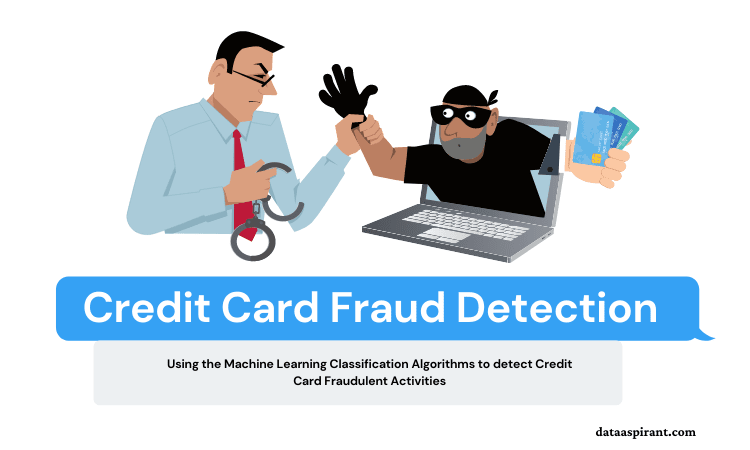

#**Dataset Problems 🧐**
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have **492** frauds out of **284,807** transactions. The dataset is highly unbalanced, the positive class ( frauds) accounts for **0.172%** of all transactions.


# **Notebook Objectives 🎯**
This notebook **aims** to:


*   **Analyze** the dataset using various visualization techniques to uncover patterns and insights.

*   **Develop** a predictive machine learning model for classifying fraudulent transactions
*   **Identify and analyze** the signs that can be used to determine whether an operation is fraudulent.



# Machine Learning Model 🤖


1.   **Logistic Regression**
2.  **Random Forest**
3.  **Extra Tree Classifier**
4.**AdaBoost**
5.**Gradient Boosting**
6.**LightGBM**

# **Dataset Description 📄**
It contains only **numerical input variables** which are the result of a **PCA transformation**. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features **V1, V2, … V28** are the principal components obtained with PCA. The only features which have not been transformed with PCA are **'Time' and 'Amount'**.

Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **'Amount'** is the transaction amount, and this feature can be used for example-dependant cost-sensitive learning. Feature **'Class'** is the response variable, and it takes the value **1** in case of fraud and **0** otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the **Area Under the Precision-Recall Curve** (**AUPRC**). Confusion matrix accuracy is not meaningful for unbalanced classification.

# **2. | Importing Libraries 📚**
**Importing libraries** that will be used in this notebook.

In [ ]:
#Core Librarie
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Metrics for Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)


# Utilities
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **3. | Data Overview 🔍**
This section provides a **high-level overview of the dataset**, including its structure, dimensions, and basic statistics.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/My_course_data_science/Final_Capstone_Project/creditcard (1).csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


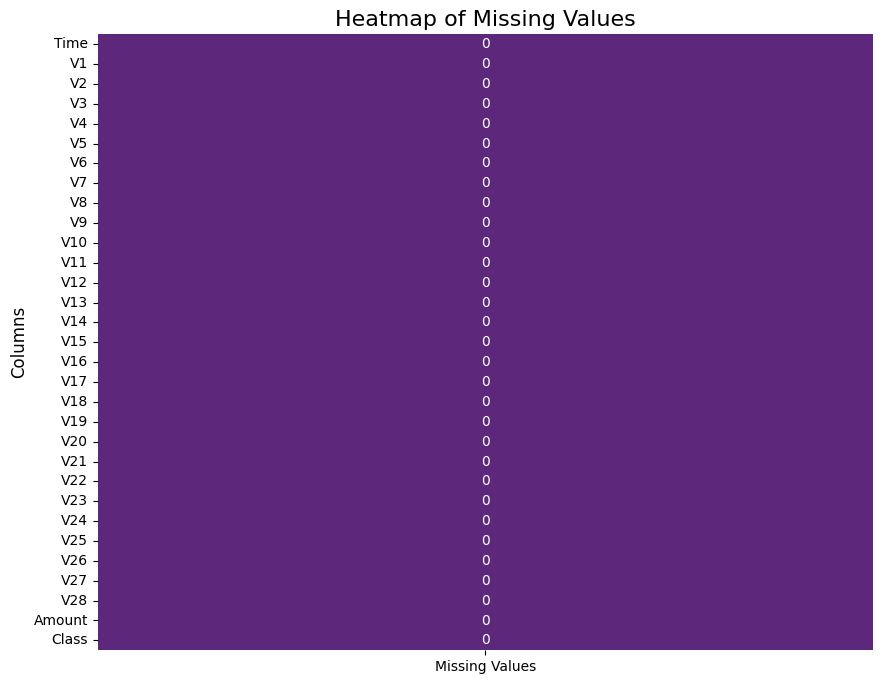

In [ ]:
# Prepare data for the heatmap
missing_data = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

# Define the custom palette
custom_palette = ['#5D287B', '#B8D0EB']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    missing_data,
    cbar=False,
    cmap=sns.color_palette(custom_palette),
    annot=True,
    fmt="d",
    yticklabels=missing_data.index
)

# Add titles and labels
plt.title('Heatmap of Missing Values', fontsize=16)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [ ]:
def print_unique_values_sorted(df):
    unique_counts = [(column, df[column].nunique()) for column in df.columns]
    unique_counts_sorted = sorted(unique_counts, key=lambda x: x[1],reverse=True)
    for column, unique_count in unique_counts_sorted:
        print(f'{column} - {unique_count} unique values')
print_unique_values_sorted(df)

V1 - 275663 unique values
V2 - 275663 unique values
V3 - 275663 unique values
V4 - 275663 unique values
V5 - 275663 unique values
V6 - 275663 unique values
V7 - 275663 unique values
V8 - 275663 unique values
V9 - 275663 unique values
V10 - 275663 unique values
V11 - 275663 unique values
V12 - 275663 unique values
V13 - 275663 unique values
V14 - 275663 unique values
V15 - 275663 unique values
V16 - 275663 unique values
V17 - 275663 unique values
V18 - 275663 unique values
V19 - 275663 unique values
V20 - 275663 unique values
V21 - 275663 unique values
V22 - 275663 unique values
V23 - 275663 unique values
V24 - 275663 unique values
V25 - 275663 unique values
V26 - 275663 unique values
V27 - 275663 unique values
V28 - 275663 unique values
Time - 124592 unique values
Amount - 32767 unique values
Class - 2 unique values


# **4. | Exploratory Data Analysis (EDA) 📊**
This section focuses on **data exploration** to understand the dataset. Visualization techniques will be used to identify patterns, distributions, and relationships between variables. In addition, **variable correlation** will be checked.

# **4.1 | Stroke Class Distribution and Imbalance Analysis**

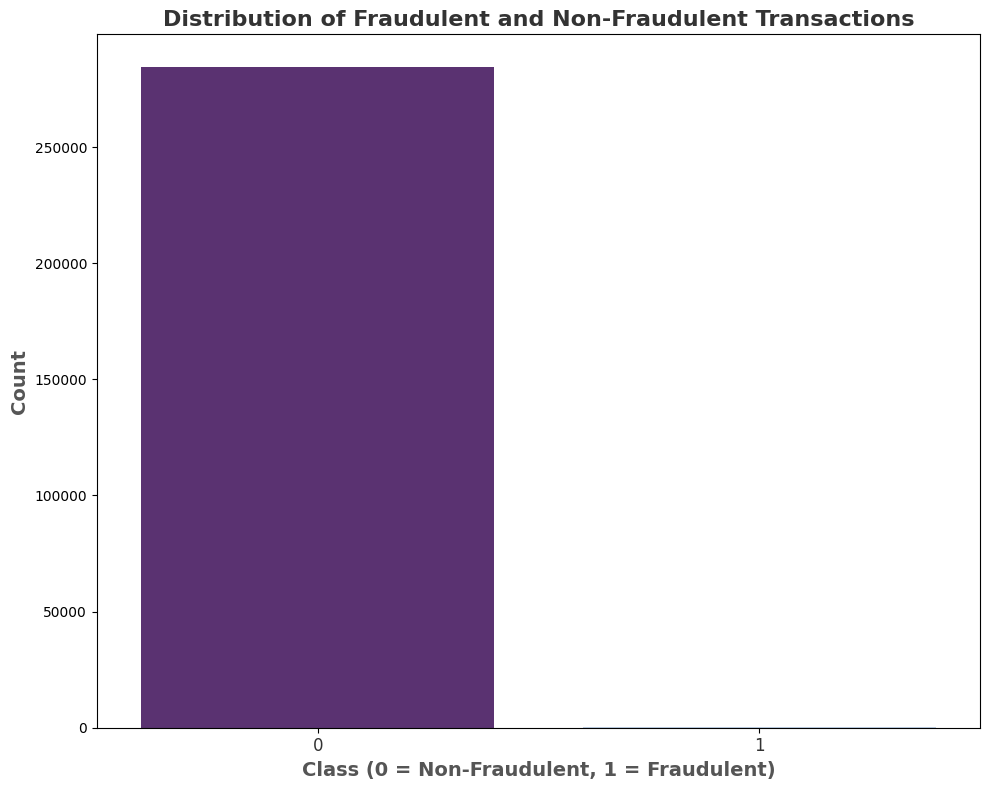

In [ ]:
# Define a custom palette for the bars
class_palette = sns.color_palette(["#5D287B", "#B8D0EB"])  # Red and blue for contrast

# Plot the distribution of the 'Class' column
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='Class', hue='Class', palette=class_palette, dodge=False)

# Add titles and labels
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions', fontsize=16, weight='bold', color="#333333")
plt.xlabel('Class (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=14, weight='bold', color="#555555")
plt.ylabel('Count', fontsize=14, weight='bold', color="#555555")

# Adjust tick params
plt.xticks(fontsize=12, color="#333333")

# Adjust layout and show the plot
plt.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
fraud_percent = df['Class'].value_counts(normalize=True)[1] * 100  # Percentage of fraudulent transactions
non_fraud_percent = df['Class'].value_counts(normalize=True)[0] * 100  # Percentage of non-fraudulent transactions

print(f"Percentage of fraudulent transactions: {fraud_percent:.2f}%")
print(f"Percentage of non-fraudulent transactions: {non_fraud_percent:.2f}%")

Percentage of fraudulent transactions: 0.17%
Percentage of non-fraudulent transactions: 99.83%


The graph illustrates the distribution of fraudulent and non-fraudulent transactions in the dataset. It shows that the vast majority of transactions, represented by the bar for **Class = 0**, are non-fraudulent. This class significantly outweighs the minority class, where **Class = 1**, representing fraudulent transactions.

To address this class imbalance, the **SMOTE (Synthetic Minority Oversampling Technique)** or other resampling methods will be used. These techniques generate synthetic samples or adjust sampling to ensure the dataset becomes more balanced, improving model training and evaluation.

# **4.2 | Pairplot of First 7 Features**

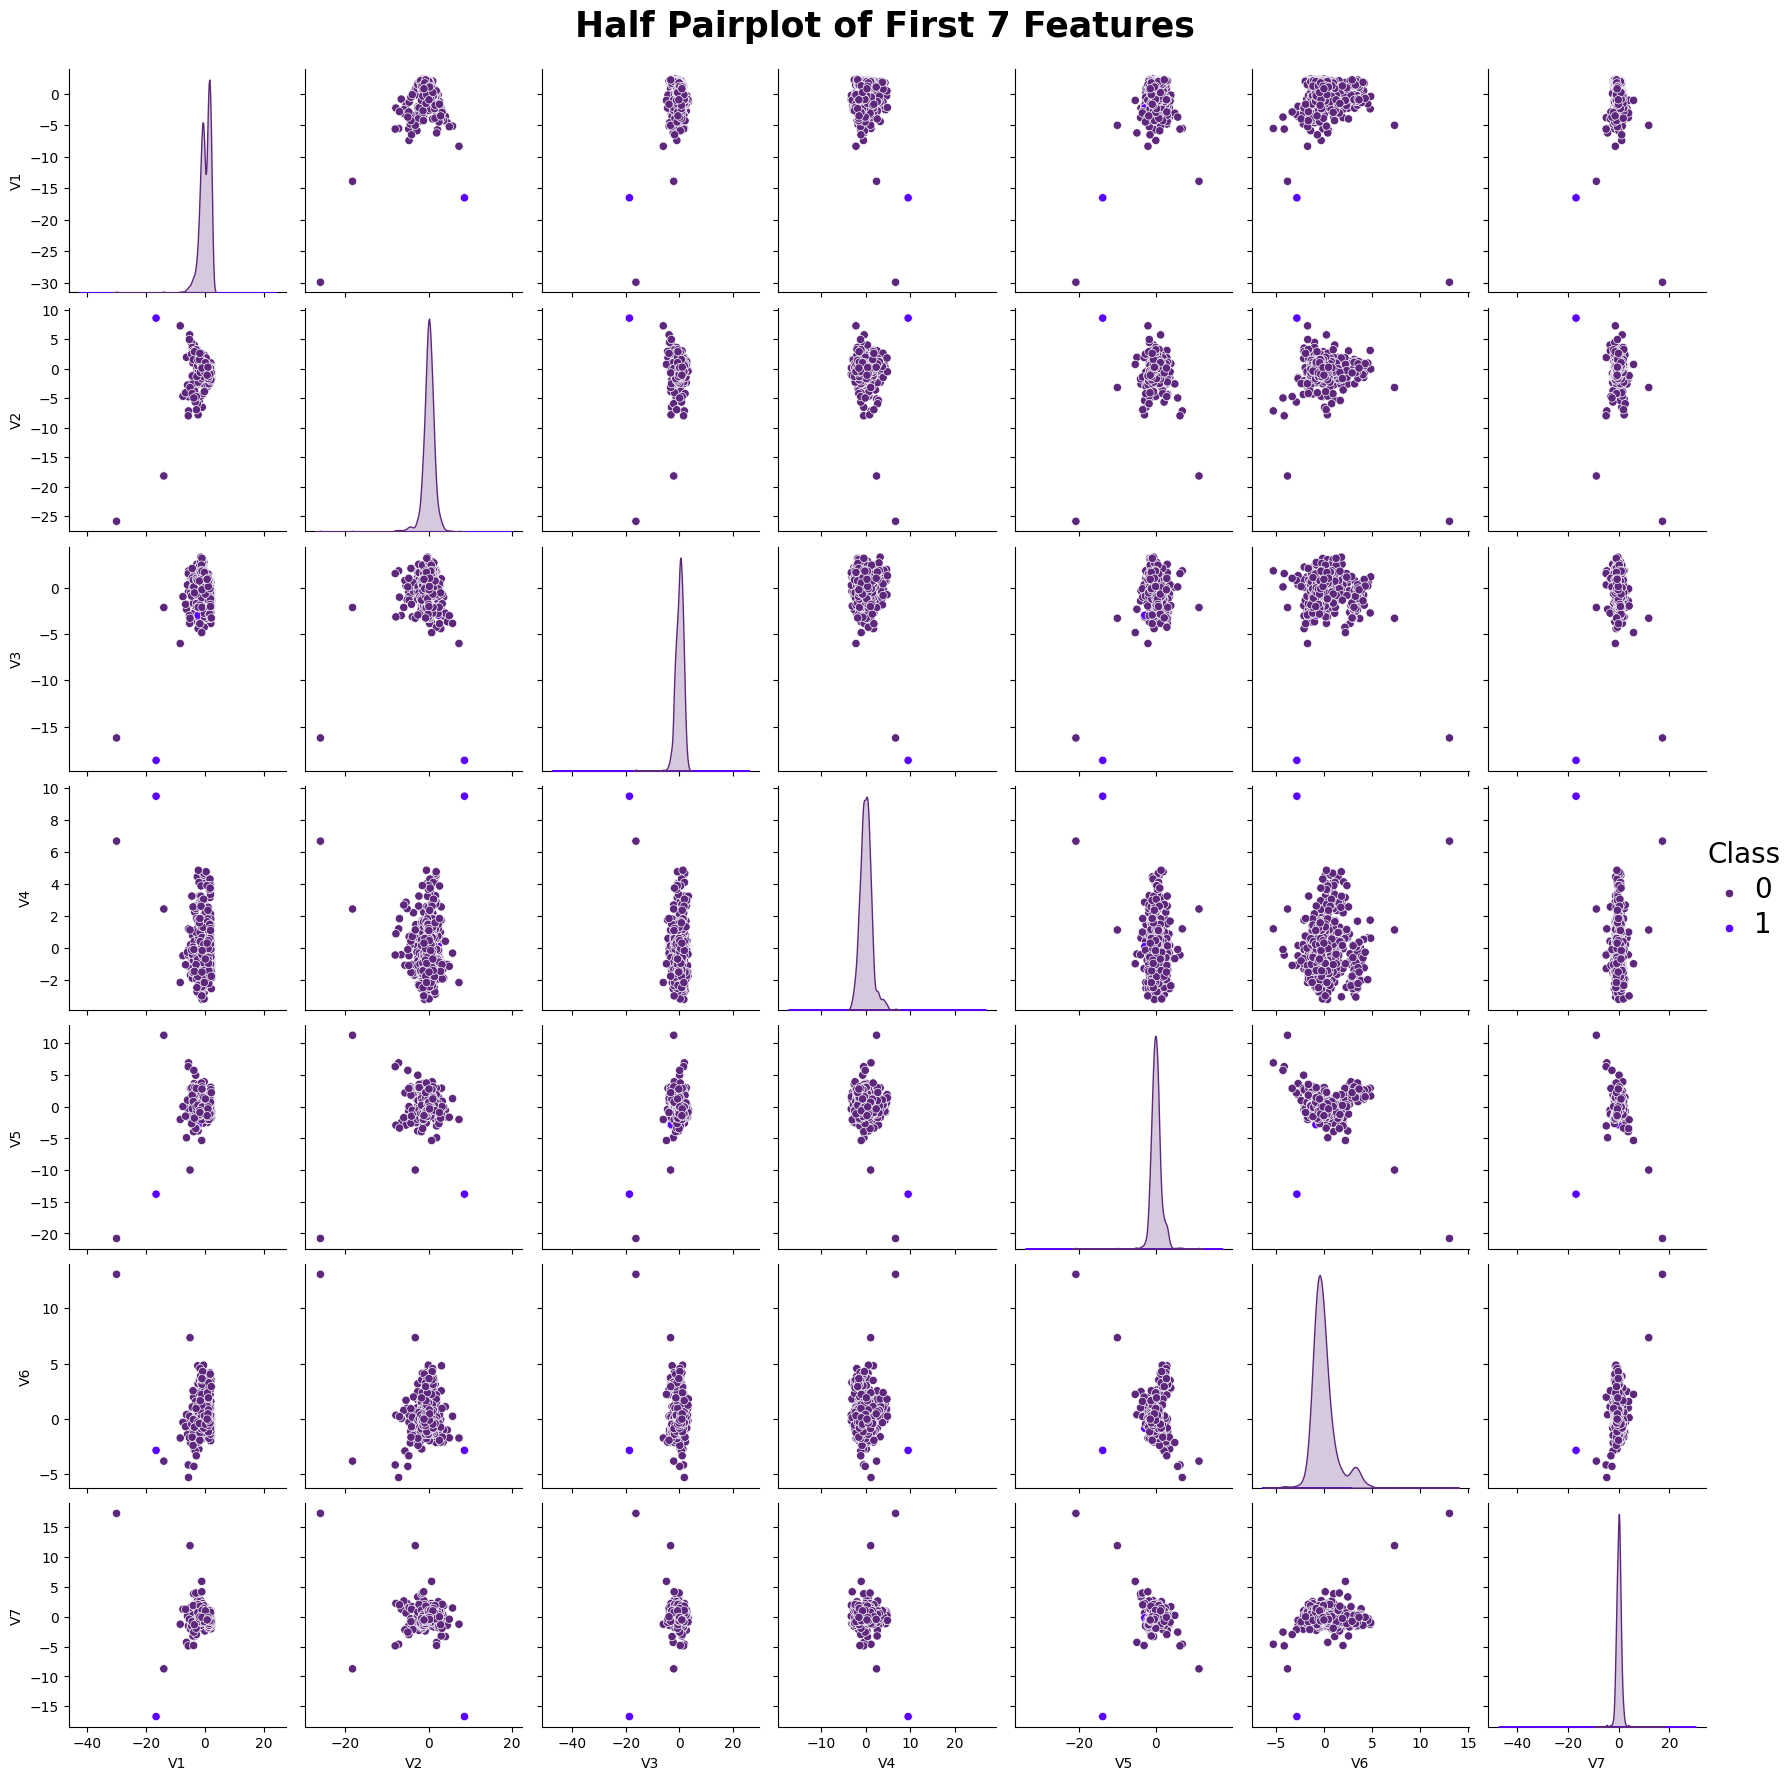

In [ ]:
# Define a custom palette
pairplot_palette = ['#5D287B', '#5900FF']

# Select the first 7 features and the target column
selected_features = ['V' + str(i) for i in range(1, 8)] + ['Class']

# Sample data
sampled_df = df[selected_features].sample(1000, random_state=42)

# Create a half pairplot
pairplot = sns.pairplot(
    sampled_df,
    hue='Class',
    palette=pairplot_palette,
    diag_kind='kde',
    corner=False
)

# Add title
plt.suptitle('Half Pairplot of First 7 Features', y=1.02, fontsize=25, weight='bold')
plt.setp(pairplot._legend.get_texts(), fontsize=20)
plt.setp(pairplot._legend.get_title(), fontsize=20)

# Show the plot
plt.show()

# Analysis of the Half Pairplot of the First 7 Features:
The graph visualizes the relationships between the first 7 features (V1 to V7) of the dataset, segmented by the target variable **Class**. The diagonal plots show the density distribution of individual features, with clear peaks for both **Class = 0** (non-fraudulent) and **Class = 1** (fraudulent).

Key observations include:

Most features show significant overlap between the two classes, particularly for **V5** and **V6**, indicating challenges in separating fraudulent from non-fraudulent transactions using these features alone.
Scatterplots between pairs of features, such as **V1** and **V2**, reveal slight clustering of fraudulent transactions **(Class = 1)**, suggesting some potential separability.
Fraudulent transactions are rare, but distinct clusters in certain feature combinations hint at opportunities for predictive modeling.
This analysis suggests the need for feature selection or engineering to better separate the classes, as well as resampling techniques like **SMOTE** to address the imbalance and improve model performance.


# **4.3 | Scatterplot & Boxplot of Transaction Amount**

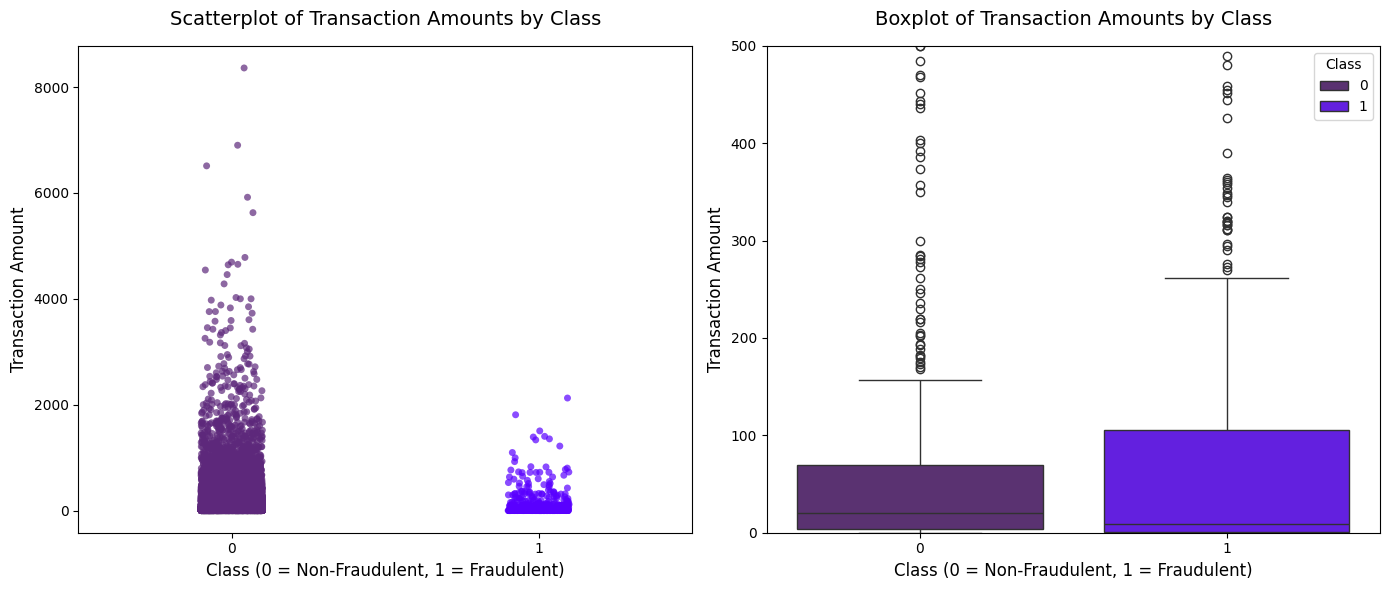

In [ ]:
# Separate fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Sample for the scatterplot (larger balanced set)
balanced_non_fraud_scatter = non_fraud.sample(len(fraud) * 100, random_state=42)
balanced_df_scatter = pd.concat([fraud, balanced_non_fraud_scatter])

# Sample for the boxplot (smaller balanced set)
balanced_non_fraud_boxplot = non_fraud.sample(len(fraud), random_state=42)
balanced_df_boxplot = pd.concat([fraud, balanced_non_fraud_boxplot])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot
sns.stripplot(
    data=balanced_df_scatter,
    x='Class',
    y='Amount',
    hue='Class',
    palette=['#5D287B', '#5900FF'],
    jitter=True,
    alpha=0.7,
    ax=axes[0],
    legend=False
)
axes[0].set_title('Scatterplot of Transaction Amounts by Class', fontsize=14, pad=15)
axes[0].set_xlabel('Class (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=12)
axes[0].set_ylabel('Transaction Amount', fontsize=12)

# Boxplot
sns.boxplot(
    data=balanced_df_boxplot,
    x='Class',
    y='Amount',
    hue='Class',
    palette=['#5D287B', '#5900FF'],
    ax=axes[1],
)
axes[1].set_title('Boxplot of Transaction Amounts by Class', fontsize=14, pad=15)
axes[1].set_xlabel('Class (0 = Non-Fraudulent, 1 = Fraudulent)', fontsize=12)
axes[1].set_ylabel('Transaction Amount', fontsize=12)
axes[1].set_ylim(0, 500)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# **Analysis of Transaction Amounts by Class:**
The two plots visualize the distribution of transaction amounts (Amount) across fraudulent and non-fraudulent classes (Class):


*   **Scatterplot:** The left plot illustrates individual transaction amounts. Non-fraudulent transactions **(Class = 0)** dominate in number, and their transaction amounts show a wider range, with some values exceeding **8000**. Fraudulent transactions **(Class = 1)** are much fewer and generally have smaller transaction amounts, mostly below **2000**.
*   **Boxplot:** The right plot provides a statistical summary of transaction amounts for each class. Fraudulent transactions **(Class = 1)** exhibit higher median values compared to non-fraudulent transactions **(Class = 0)**. However, there are significant overlaps between the two classes, and both show the presence of outliers, with some fraudulent transactions exceeding **300**.

These observations highlight that while fraudulent transactions generally have smaller amounts, the overlap in distributions suggests that transaction amount alone may not be a definitive feature for fraud detection. Additional features and a more robust modeling approach will likely be required for accurate classification.



# **4.4 | Histplot for Transaction Distribution:**

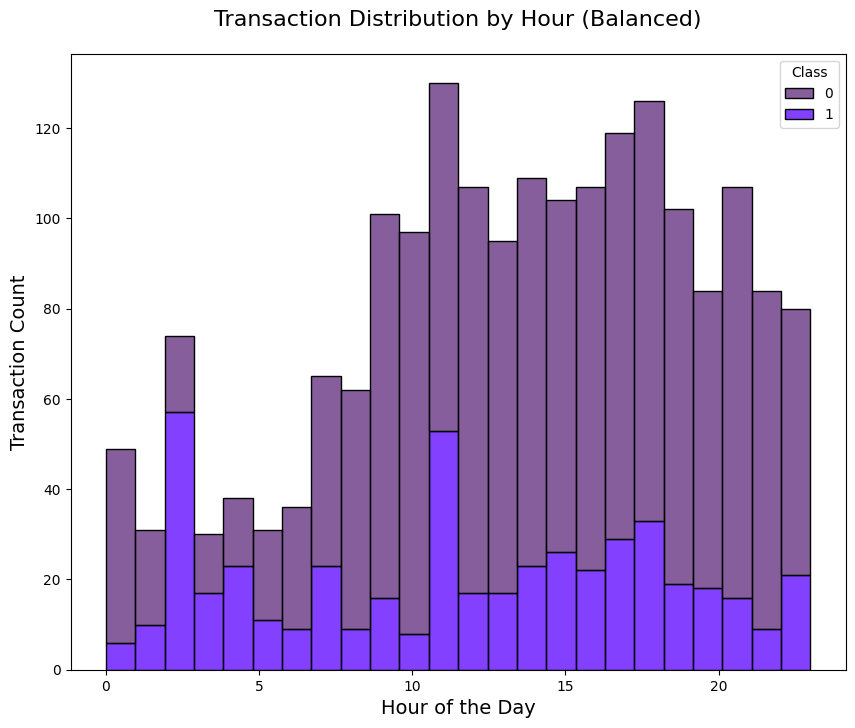

In [ ]:
# Separate fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Sample the same number of non-fraud transactions as fraud transactions
balanced_non_fraud = non_fraud.sample(len(fraud)*3, random_state=42)

# Combine the fraud and balanced non-fraud data
balanced_df = pd.concat([fraud, balanced_non_fraud])

# Add the 'Hour' feature
balanced_df['Hour'] = (balanced_df['Time'] // 3600) % 24

# Create the histogram
plt.figure(figsize=(10,8))
sns.histplot(data=balanced_df, x='Hour', hue='Class', multiple='stack', bins=24, palette=['#5D287B', '#5900FF'])

# Add title and labels
plt.title('Transaction Distribution by Hour (Balanced)', fontsize=16,pad = 20)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)

# Show the plot
plt.show()

# **Analysis of Transaction Distribution by Hour (Balanced):**
The plot visualizes the distribution of transactions across different hours of the day, segmented by fraudulent and non-fraudulent classes (Class):


*   **Fraudulent Transactions:** Represented by the color **Class = 1**, fraudulent transactions show activity throughout the day, with notable peaks in the early hours **(around 0-5)** and during business hours **(around 10-15)**.
*   **Non-Fraudulent Transactions:** Represented by the color Class = 0, non-fraudulent transactions are consistently higher in count compared to fraudulent ones across all hours. A significant concentration of these transactions occurs during business hours, peaking at around **12**.

These observations highlight distinct transaction patterns between the two classes. While fraudulent transactions are more evenly distributed throughout the day, non-fraudulent transactions follow a more predictable pattern, peaking during typical business hours. These differences could be leveraged for fraud detection by incorporating temporal patterns into the modeling approach.



# **4.5 | Correlation Matrix**

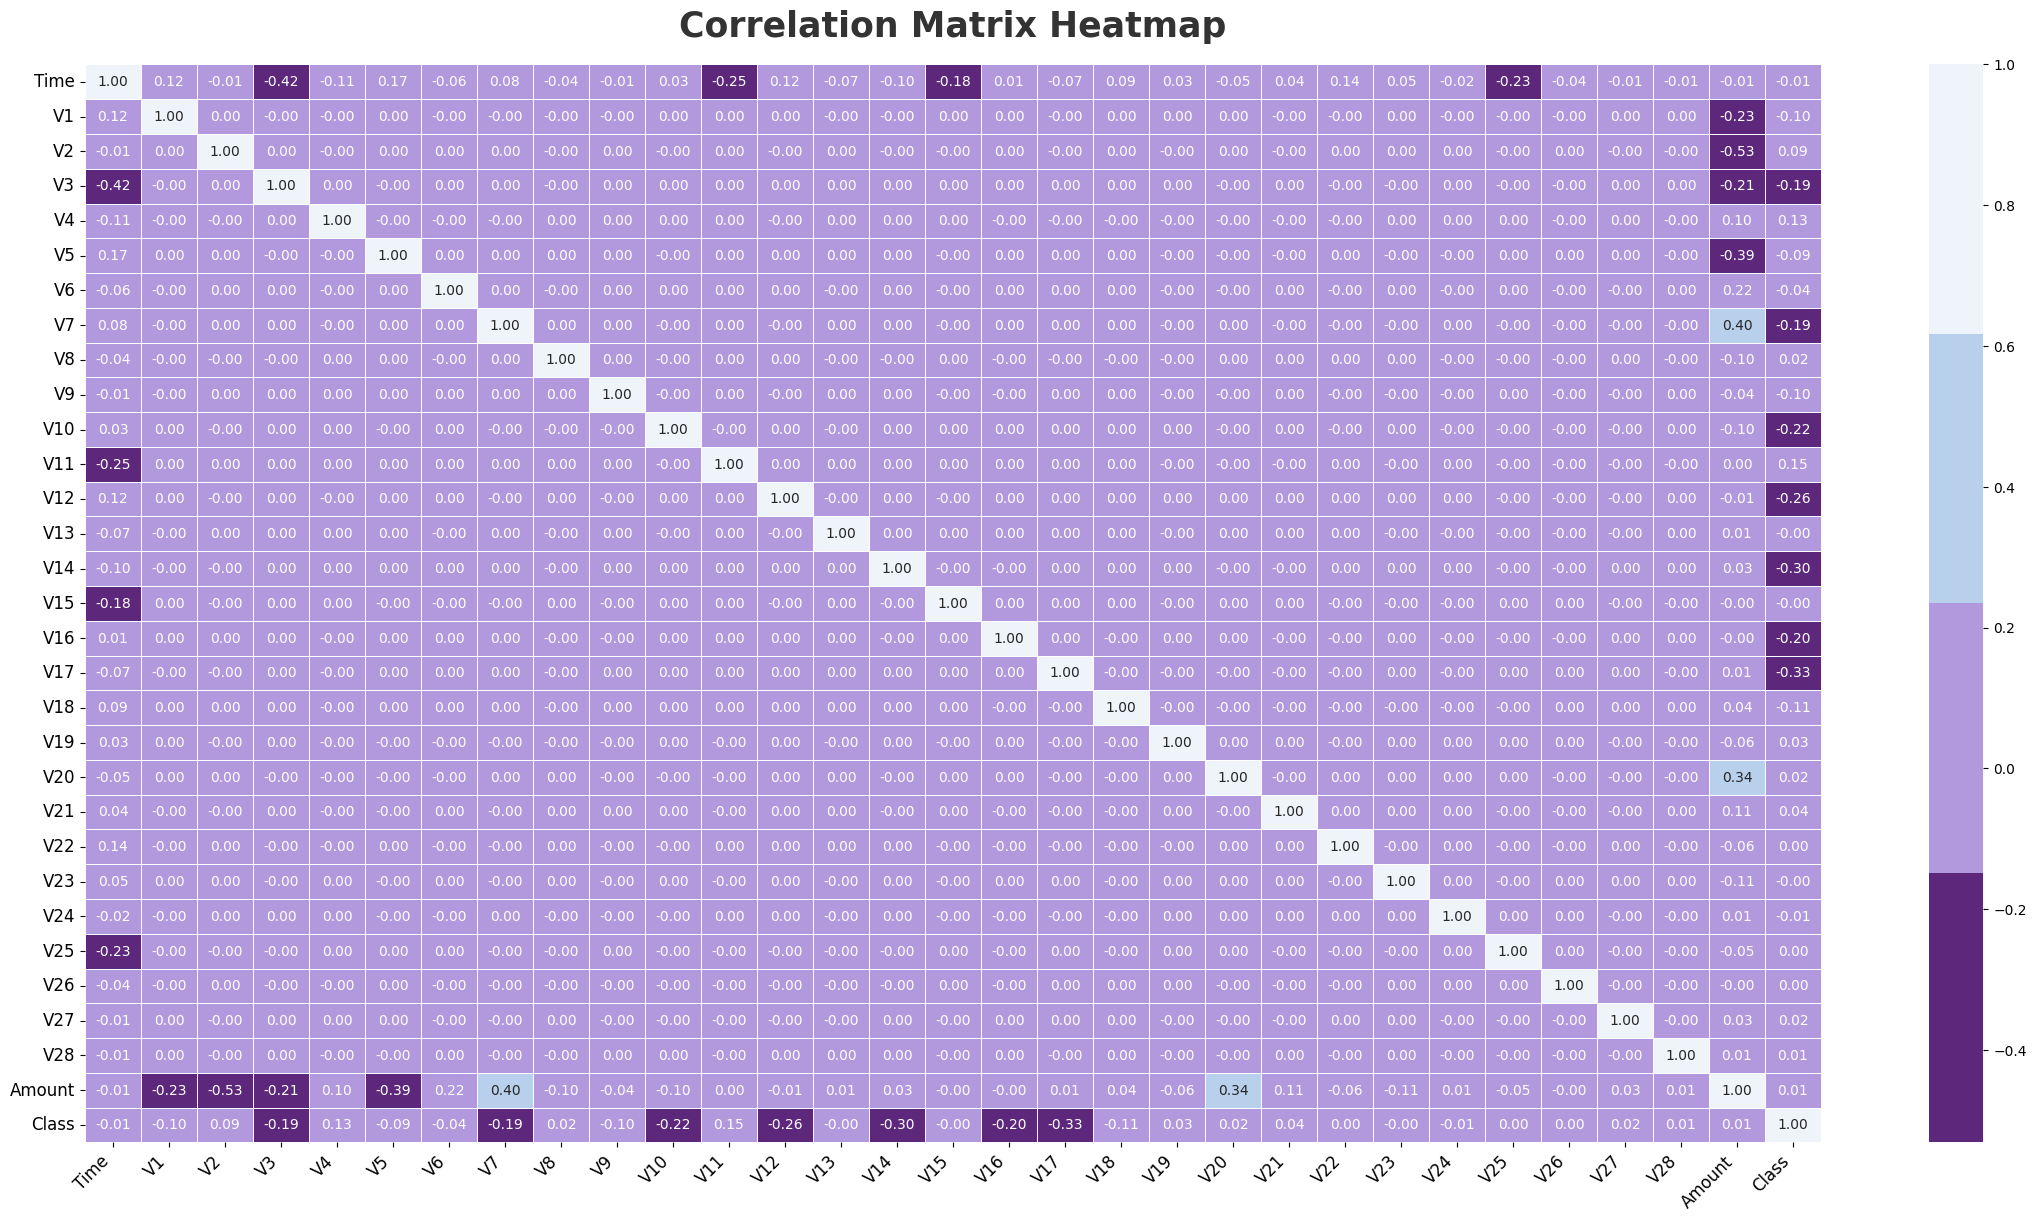

In [ ]:
correlation_matrix = df.corr()
custom_palette = ['#5D287B', '#B298DC', '#B8D0EB', '#EFF4FB']
# Create the heatmap
plt.figure(figsize=(28, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(custom_palette, as_cmap=True),
    linewidths=0.5,
    linecolor="white"
)

# Customize ticks
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=25, weight='bold', color="#333333", pad=20)

# Show the plot
plt.show()

# **Analysis of the Correlation Matrix Heatmap:**
The heatmap visualizes the correlation coefficients between all features in the dataset, including the target variable (**Class**).


*   High correlations: Some features show strong correlations with each other, such as V2 and V5, as well as Amount and Class. These correlations suggest potential dependencies between these features.

*   Weak correlations: Most features have near-zero correlations with each other, as expected from the PCA transformation. This indicates minimal linear relationships among these features, which aligns with the nature of PCA-derived data.
*   Target variable: The target variable (Class) shows a modest correlation with V14 (0.3) and V17 (0.34), suggesting these features may provide predictive power in identifying fraudulent transactions.

Overall, the heatmap suggests that most features are uncorrelated due to PCA transformation.



# **5. | Data Pre-processing 🧬**
This section will focus on **preparing the dataset for modeling**. Techniques such as categorical variable coding, numerical feature normalization, and target class balancing will be applied.

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24

# Minute
df['Minute'] = (df['Time'] // 60) % 60

# Second
df['Second'] = df['Time'] % 60

# IsDay
df['IsDay'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

# PartOfDay
def part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['PartOfDay'] = df['Hour'].apply(part_of_day)

# TransactionPhase
df['TransactionPhase'] = pd.qcut(df['Time'], q=4, labels=['Early', 'Midday', 'Late', 'End'])

# ActivityLevel
df['ActivityLevel'] = df['Hour'].map(df['Hour'].value_counts())

# LogTime
df['LogTime'] = np.log1p(df['Time'])

df.drop(columns=['Time'])

df = pd.get_dummies(df, columns=['TransactionPhase', 'PartOfDay'], drop_first=True)

# **Feature Engineering from the Time Column:**
The code performs extensive feature engineering on the Time column of the dataset, extracting meaningful information and creating new features for better analysis and modeling.


*   **Hour**: Extracted using **df['Time'] // 3600 % 24**, this feature represents the hour of the day for each transaction.
*   **Minute**: Extracted using **df['Time'] // 60 % 60**, this feature represents the minute within the hour.


*   **Second:** Extracted using **df['Time'] % 60**, this feature represents the second within the minute.
*   **IsDay:** A binary feature indicating whether the transaction occurred during the daytime (6 AM to 6 PM). Calculated using a lambda function: 1 if 6 <= x < 18 else 0.


*   **PartOfDay**: Categorizes the Hour feature into four parts: Morning, Afternoon, Evening, and Night. A custom function determines the part of the day based on the hour.
*   **TransactionPhase**: Divides the entire time range into four equal intervals: Early, Midday, Late, and End, using pd.qcut.


*   **ActivityLevel:** Captures the transaction density by mapping the count of transactions for each hour to the Hour feature.
*   **LogTime:** Applies logarithmic transformation to the Time column using np.log1p to reduce the effect of skewness.


*   **One-Hot Encoding:** Converts categorical features (TransactionPhase and PartOfDay) into dummy variables using pd.get_dummies, ensuring the dataset is suitable for machine learning models.

These engineered features aim to extract meaningful patterns and address the temporal aspects of the data, making it more informative and suitable for predictive modeling.











In [ ]:
X, y = df.drop('Class', axis=1), df['Class']
print("Class balance before SMOTE:")
print(pd.Series(y.value_counts()))

Class balance before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print("Class balance after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class balance after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


# **Steps for Balancing Classes Using SMOTE:**
The code illustrates the process of addressing class imbalance in the dataset by applying the **SMOTE (Synthetic Minority Oversampling Technique)** algorithm.


1.   **Step 1: Checking Class Balance Before SMOTE**
        *   The dataset is split into features (X) and the target variable (y).
        *   The initial class distribution is checked using y.value_counts(), which shows a significant imbalance:
            *   **Class = 0** (non-fraudulent): 284,315 samples
            *   **Class = 1** (fraudulent): 492 samples
2.   **Step 2: Applying SMOTE**
        *   The SMOTE algorithm is initialized with random_state=42 to ensure reproducibility.
        *   Using sm.fit_resample(X, y), synthetic samples are generated for the minority class **(Class = 1)** to balance the dataset.
        *   The resulting class distribution is:
            *   **Class = 0:** 284,315 samples
            *   **Class = 1:** 284,315 samples

These steps highlight the use of SMOTE to create a balanced dataset, which is crucial for training machine learning models on highly imbalanced data. Balancing ensures that the model learns to identify both classes effectively and avoids bias toward the majority class.









In [ ]:
# Combine X and y into a single DataFrame for easier processing
data = X_resampled.copy()
data['Target'] = y_resampled

# Configure RandomUnderSampler
reduction_factor = 0.01  # Desired reduction factor (1%)
desired_sample_size = int(len(data) * reduction_factor)
sampler = RandomUnderSampler(
    sampling_strategy={0: desired_sample_size // 2, 1: desired_sample_size // 2},
    random_state=42
)

# Apply RandomUnderSampler
X_reduced, y_reduced = sampler.fit_resample(data.drop(columns=['Target']), data['Target'])

# Convert the result back to DataFrame and Series
X_reduced = pd.DataFrame(X_reduced, columns=X_resampled.columns)  #
y_reduced = pd.Series(y_reduced, name='Сlass')

# Check the class balance after resampling
print("Class balance after RandomUnderSampler:")
print(y_reduced.value_counts())

Class balance after RandomUnderSampler:
Сlass
0    2843
1    2843
Name: count, dtype: int64


# **Random Undersampling for Class Balancing:**
This code demonstrates how to apply **Random Undersampling** to address class imbalance in a dataset.
*  **Preparation:** A combined DataFrame is created with feature columns and the target variable.
*   **Random Undersampler:**
    *   The RandomUnderSampler is configured with a sampling strategy based on a desired class balance ratio.
    *   The resampling process ensures equal representation for both classes, reducing the majority class to match the size of the minority class.
*   **Result:** The resampled data is converted back into a DataFrame, and the class distribution is printed for verification.

This approach is particularly useful when dealing with highly imbalanced datasets, ensuring fair model training and improved predictive performance.






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train-Test Split and Data Standardization:**
The code demonstrates the process of splitting the dataset into training and testing sets, followed by standardization of the feature values using **StandardScaler**.
*   **Train-Test Split:**
    *   The resampled dataset (X_resampled and y_resampled) is split into training and testing sets using train_test_split.
    *   A test size of **20%** is specified, meaning 20% of the data is allocated for testing, and 80% for training.
    *   The parameter random_state=42 ensures reproducibility of the split.
*   **Data Standardization:**
    *   The StandardScaler is initialized and fitted to the training data (X_train).
    *   fit_transform is applied to scale the training set (X_train_scaled), centering the data to have a mean of 0 and a standard deviation of 1.
    *   The same scaler is applied to the test set using transform, ensuring the test data is standardized in the same way as the training data, without data leakage.

These steps ensure the dataset is prepared correctly for training machine learning models, enhancing model performance and reducing biases due to unscaled features.








# **6. | Modeling 🤖**
This section involves **training machine learning models** to solve the problem. Different algorithms will be tested, and their performances compared using suitable metrics.

In [ ]:
model_metrics = []
feature_importance_list = []

def evaluate_and_visualize(model, X_train, X_test, y_train, y_test):
    global model_metrics, feature_importance_list

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test and train data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Train and test accuracy
    score_train = round(accuracy_score(y_train, y_pred_train) * 100, 3)
    score_test = round(accuracy_score(y_test, y_pred_test) * 100, 3)
    print(f"\nTrain and Test Accuracy Scores:")
    print(f"\t>> Train Accuracy: {score_train}%")
    print(f"\t>> Test Accuracy: {score_test}%")

    # Classification Report
    report = classification_report(y_test, y_pred_test, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred_test)

    # Append model metrics
    model_metrics.append({
        "Model": model.__class__.__name__,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Accuracy": accuracy
    })

    # Subplots for evaluation visuals
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Learning curve
    def plot_learning_curve(ax, estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        ax.plot(train_sizes, train_mean, label='Training score', marker='o', color='#5D287B')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='#5D287B')

        ax.plot(train_sizes, test_mean, label='Validation score', marker='o', color='#5900FF')
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='#5900FF')

        ax.set_title('Learning Curve', pad=10)
        ax.set_xlabel('Training Set Size')
        ax.set_ylabel('Accuracy')
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=20)
        ax.grid()

    plot_learning_curve(axes[0, 0], model, X_train, y_train)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap=sns.color_palette(["#5D287B", "#5900FF"]),
        xticklabels=['Fraud', 'No Fraud'],
        yticklabels=['Fraud', 'No Fraud'],
        cbar=False,
        annot_kws={"color": "white", "fontsize": '14'},
        ax=axes[0, 1]
    )

    axes[0, 1].set_title('Confusion Matrix', pad=10)
    axes[0, 1].set_xlabel('Predicted Labels')
    axes[0, 1].set_ylabel('True Labels')

    # Feature importances (if available)
    if hasattr(model, 'coef_') or hasattr(model, 'feature_importances_'):
        if hasattr(model, 'coef_'):
            feature_importances = np.abs(model.coef_[0])
        elif hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_

        top_features = np.argsort(feature_importances)[-7:][::-1]
        feature_importance_list.append({
            "Model": model.__class__.__name__,
            "Feature Importances": {f"V{i}": feature_importances[i] for i in top_features}
        })

        axes[1, 0].barh(range(len(top_features)), feature_importances[top_features], color='#5D287B')
        axes[1, 0].set_yticks(range(len(top_features)))
        axes[1, 0].set_yticklabels([f'V {i}' for i in top_features])
        axes[1, 0].set_xlabel('Importance')
        axes[1, 0].set_title('Top 7 Feature Importances', pad=10)
        axes[1, 0].invert_yaxis()
        axes[1, 0].grid(axis='x')
    else:
        axes[1, 0].axis('off')
        axes[1, 0].set_title('Feature importance not available', pad=10)

    # ROC-AUC Curve
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        axes[1, 1].plot(fpr, tpr, color='#5D287B', label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[1, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
        axes[1, 1].set_title('ROC-AUC Curve', pad=10)
        axes[1, 1].set_xlabel('False Positive Rate')
        axes[1, 1].set_ylabel('True Positive Rate')
        axes[1, 1].legend(loc='lower right')
        axes[1, 1].grid()

    plt.subplots_adjust(hspace=-0.4)
    plt.tight_layout()
    plt.show()

# **6.1 | Logistic Regression:**
Logistic Regression is a linear model used for binary classification tasks, predicting the probability of the positive class.


Train and Test Accuracy Scores:
	>> Train Accuracy: 97.691%
	>> Test Accuracy: 97.54%


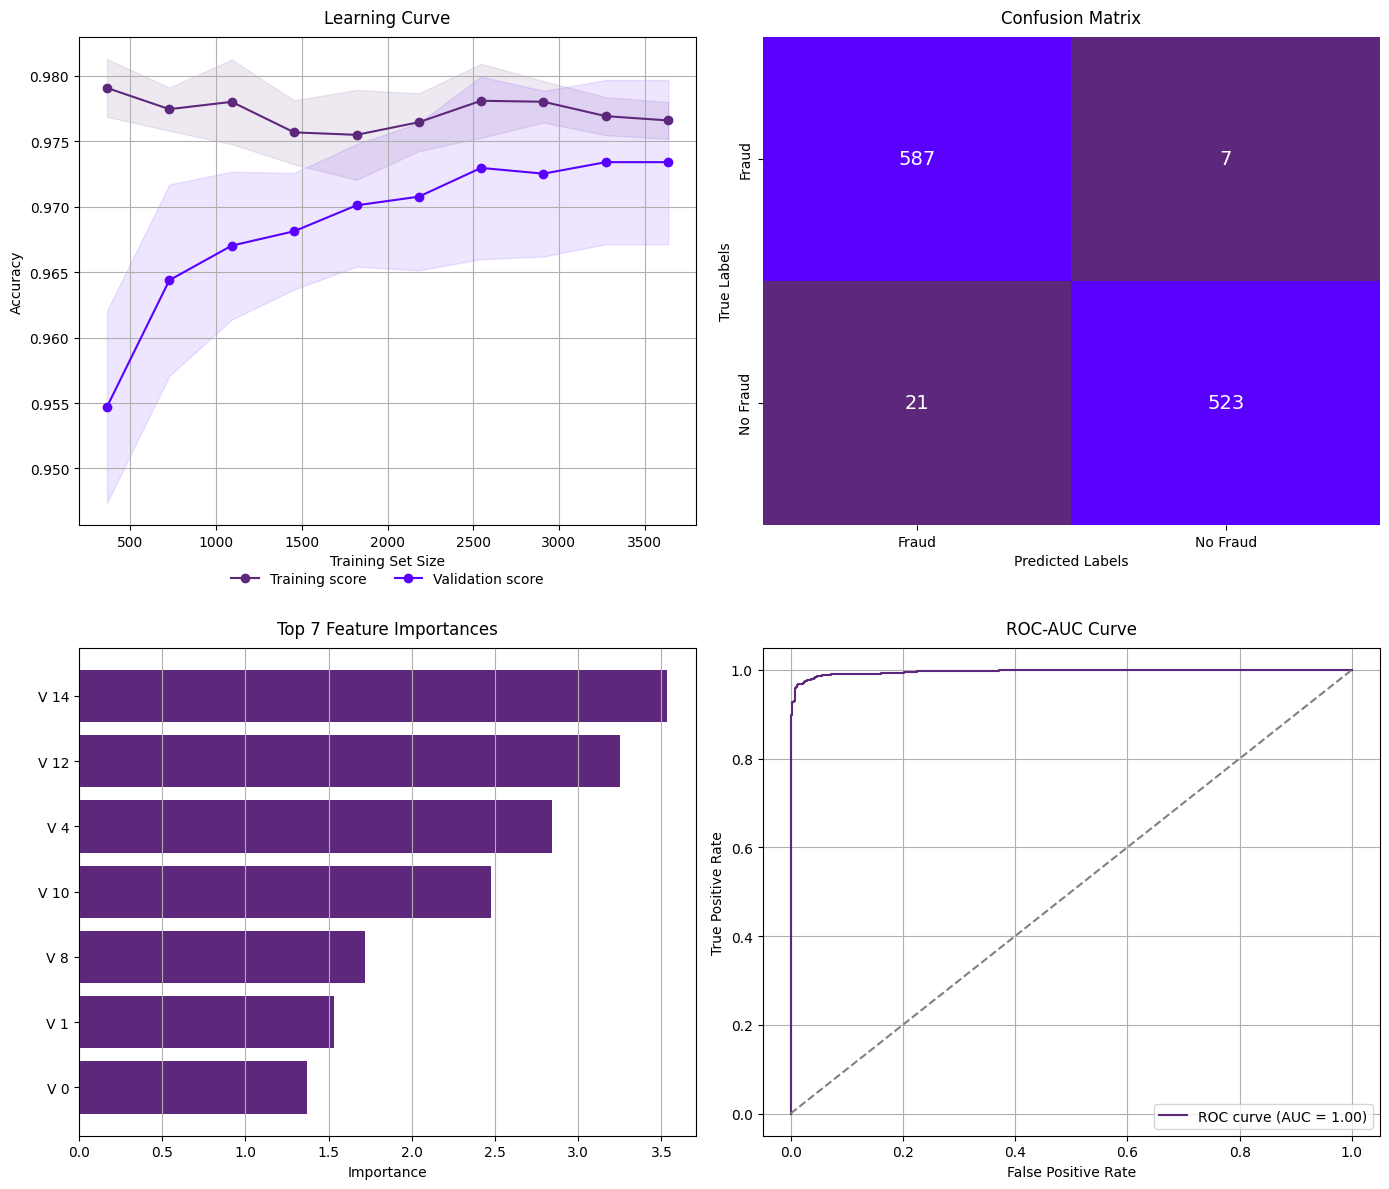

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Call the evaluation function with the defined model and dataset
evaluate_and_visualize(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# **6.2 | Random Forest:**
Random Forest is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting.


Train and Test Accuracy Scores:
	>> Train Accuracy: 100.0%
	>> Test Accuracy: 98.682%


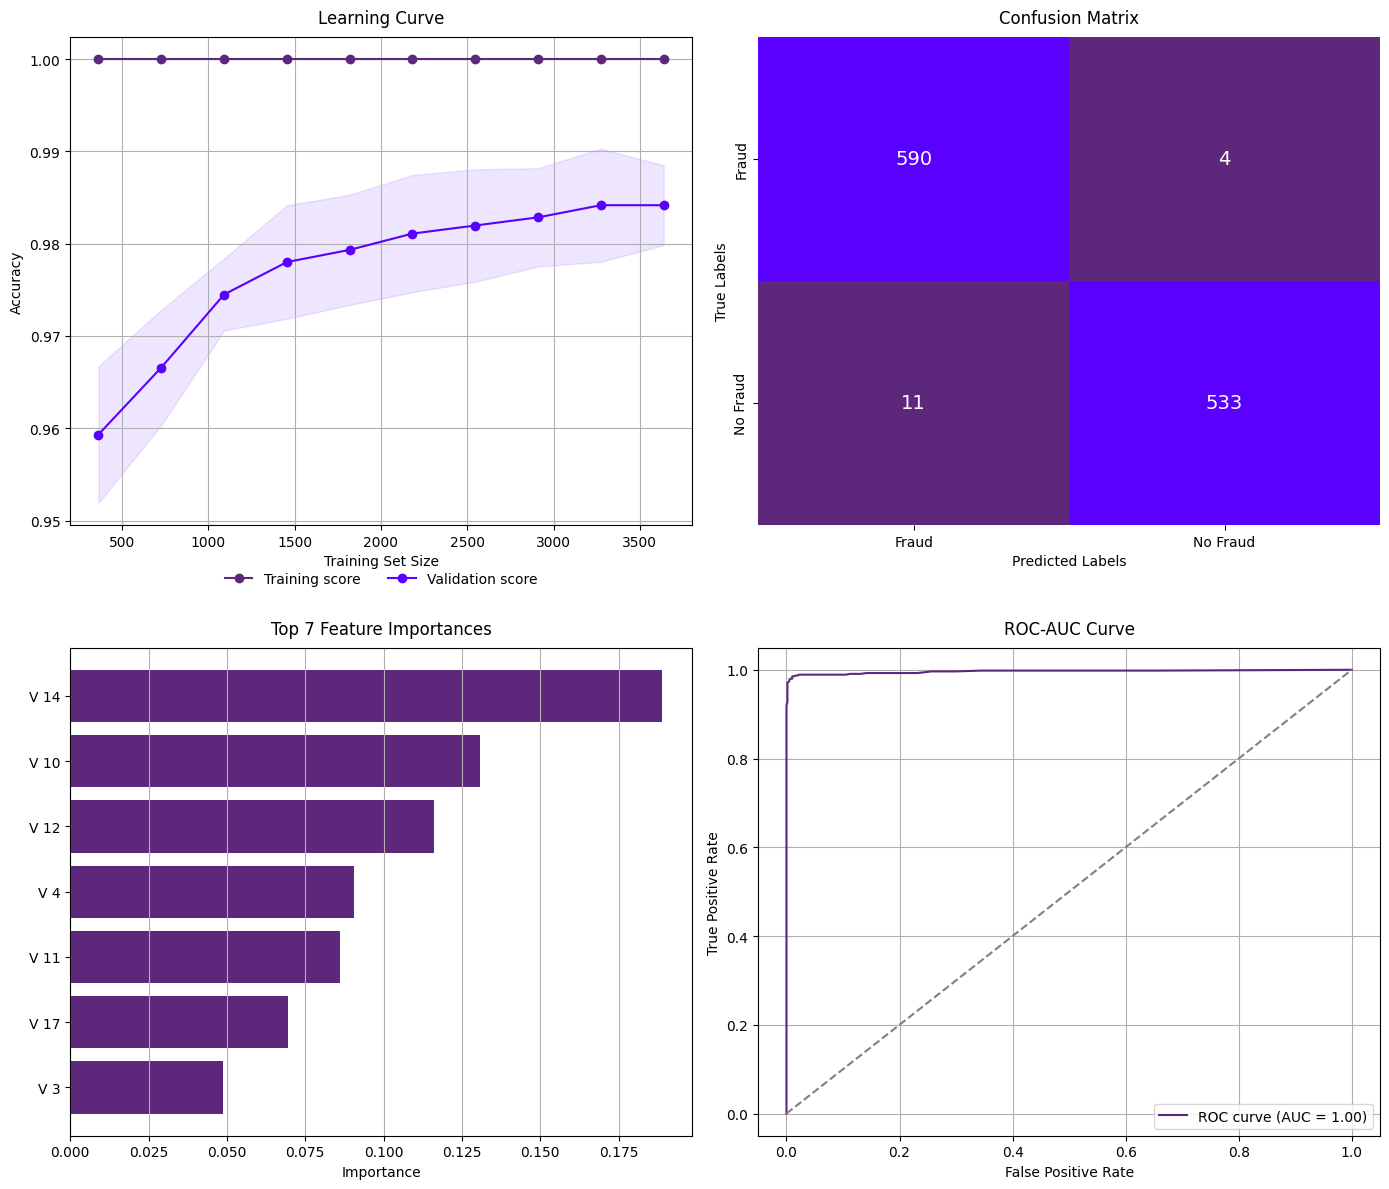

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_and_visualize(rf, X_train_scaled, X_test_scaled, y_train, y_test)

# **6.3 | Extra Tree Classifier:**
Extra Tree Classifier is an ensemble method similar to Random Forest but uses randomized thresholds for splitting nodes, which increases diversity and reduces variance.


Train and Test Accuracy Scores:
	>> Train Accuracy: 100.0%
	>> Test Accuracy: 99.121%


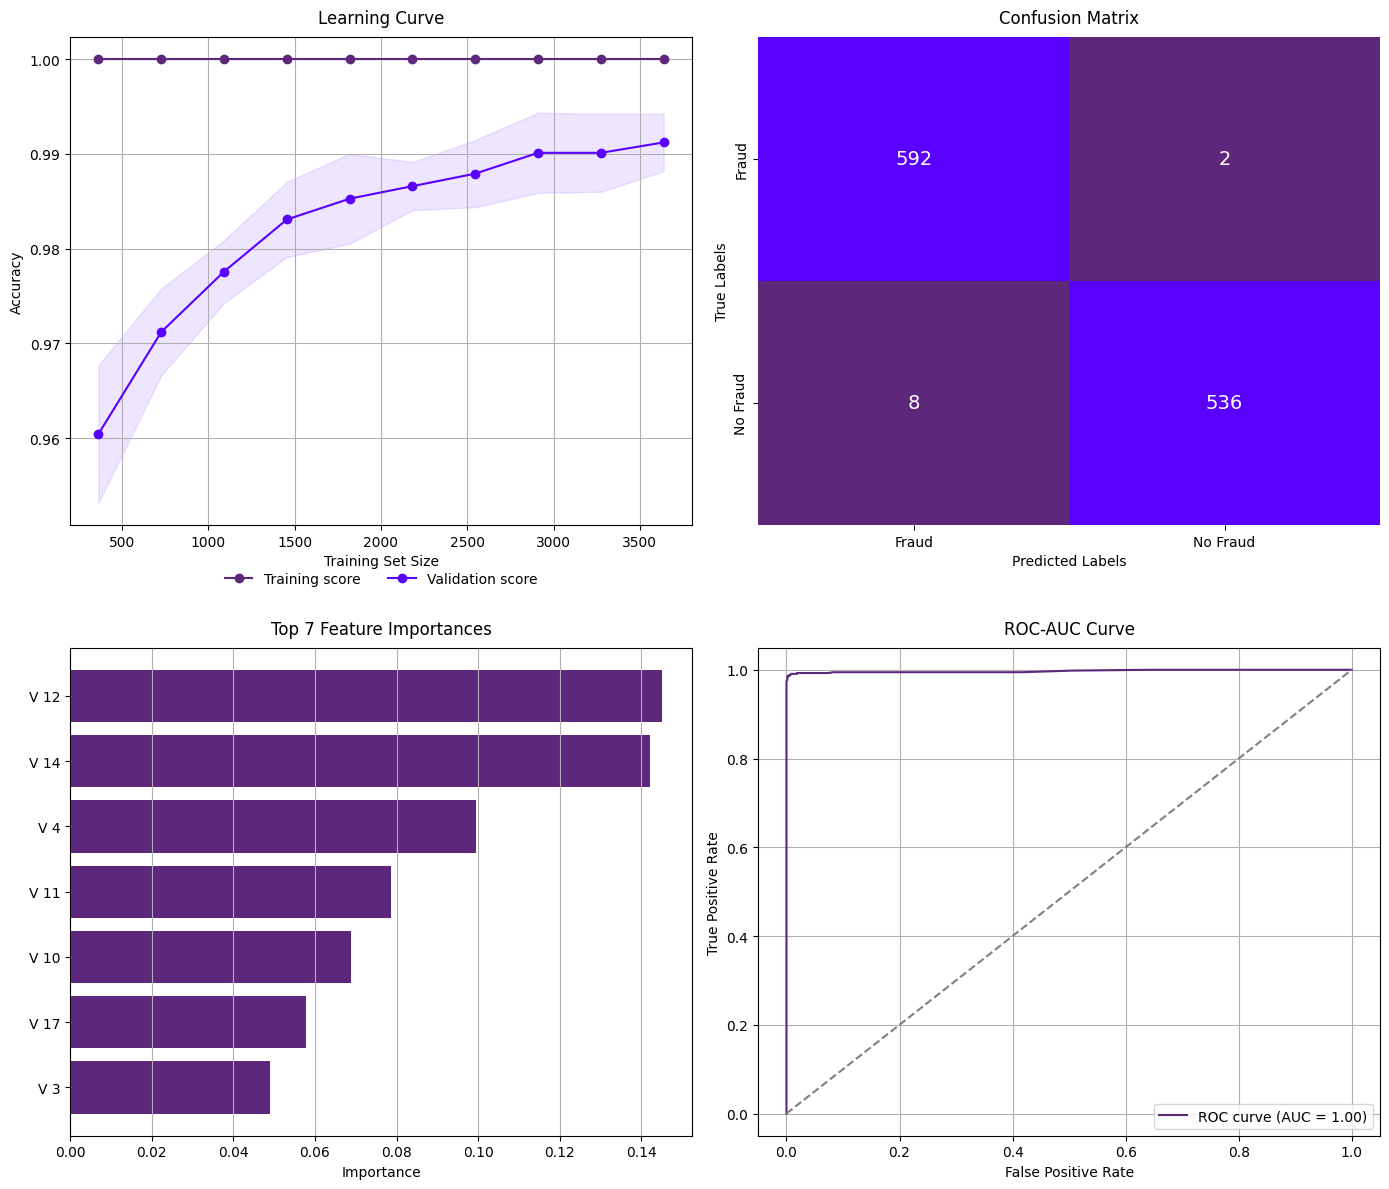

In [ ]:
# Extra Trees Classifier
et = ExtraTreesClassifier(random_state=42)
evaluate_and_visualize(et, X_train_scaled, X_test_scaled, y_train, y_test)

# **6.4 | AdaBoost:**
AdaBoost is an ensemble method that combines weak classifiers sequentially to create a strong classifier by focusing more on misclassified data points.


Train and Test Accuracy Scores:
	>> Train Accuracy: 97.757%
	>> Test Accuracy: 97.364%


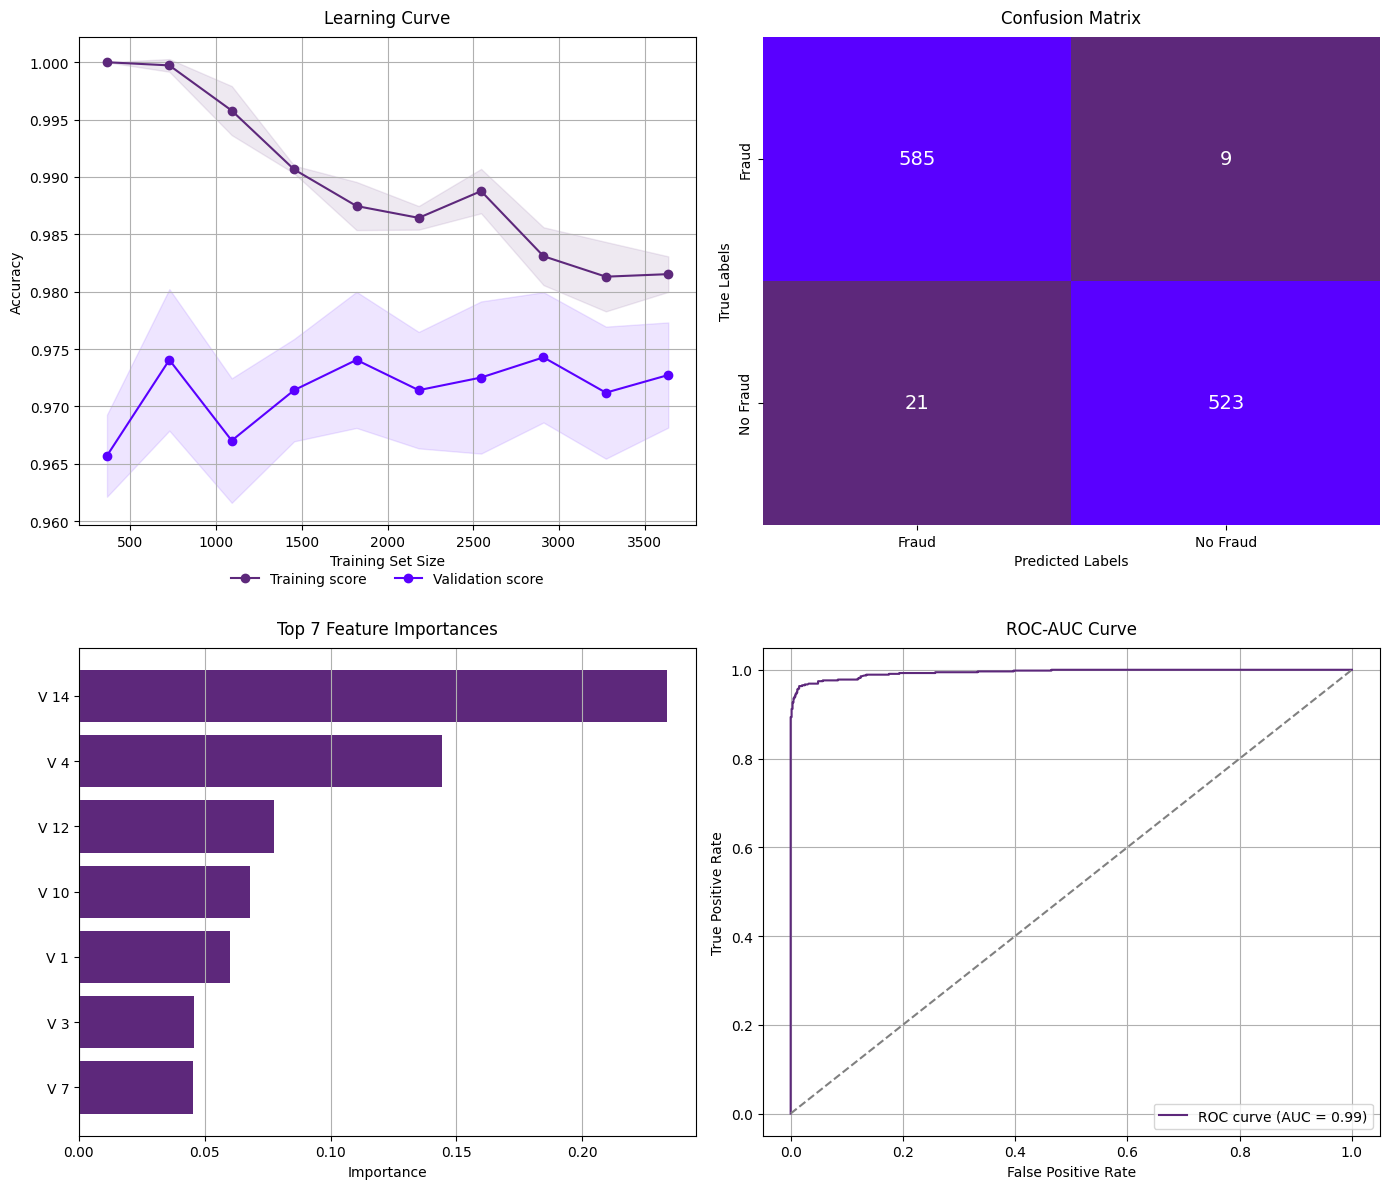

In [ ]:
# AdaBoost
ada = AdaBoostClassifier(random_state=42)
evaluate_and_visualize(ada, X_train_scaled, X_test_scaled, y_train, y_test)

# **6.5 | Gradient Boosting:**
Gradient Boosting builds models sequentially, optimizing for errors of the previous models to create a strong predictive model.


Train and Test Accuracy Scores:
	>> Train Accuracy: 99.736%
	>> Test Accuracy: 97.891%


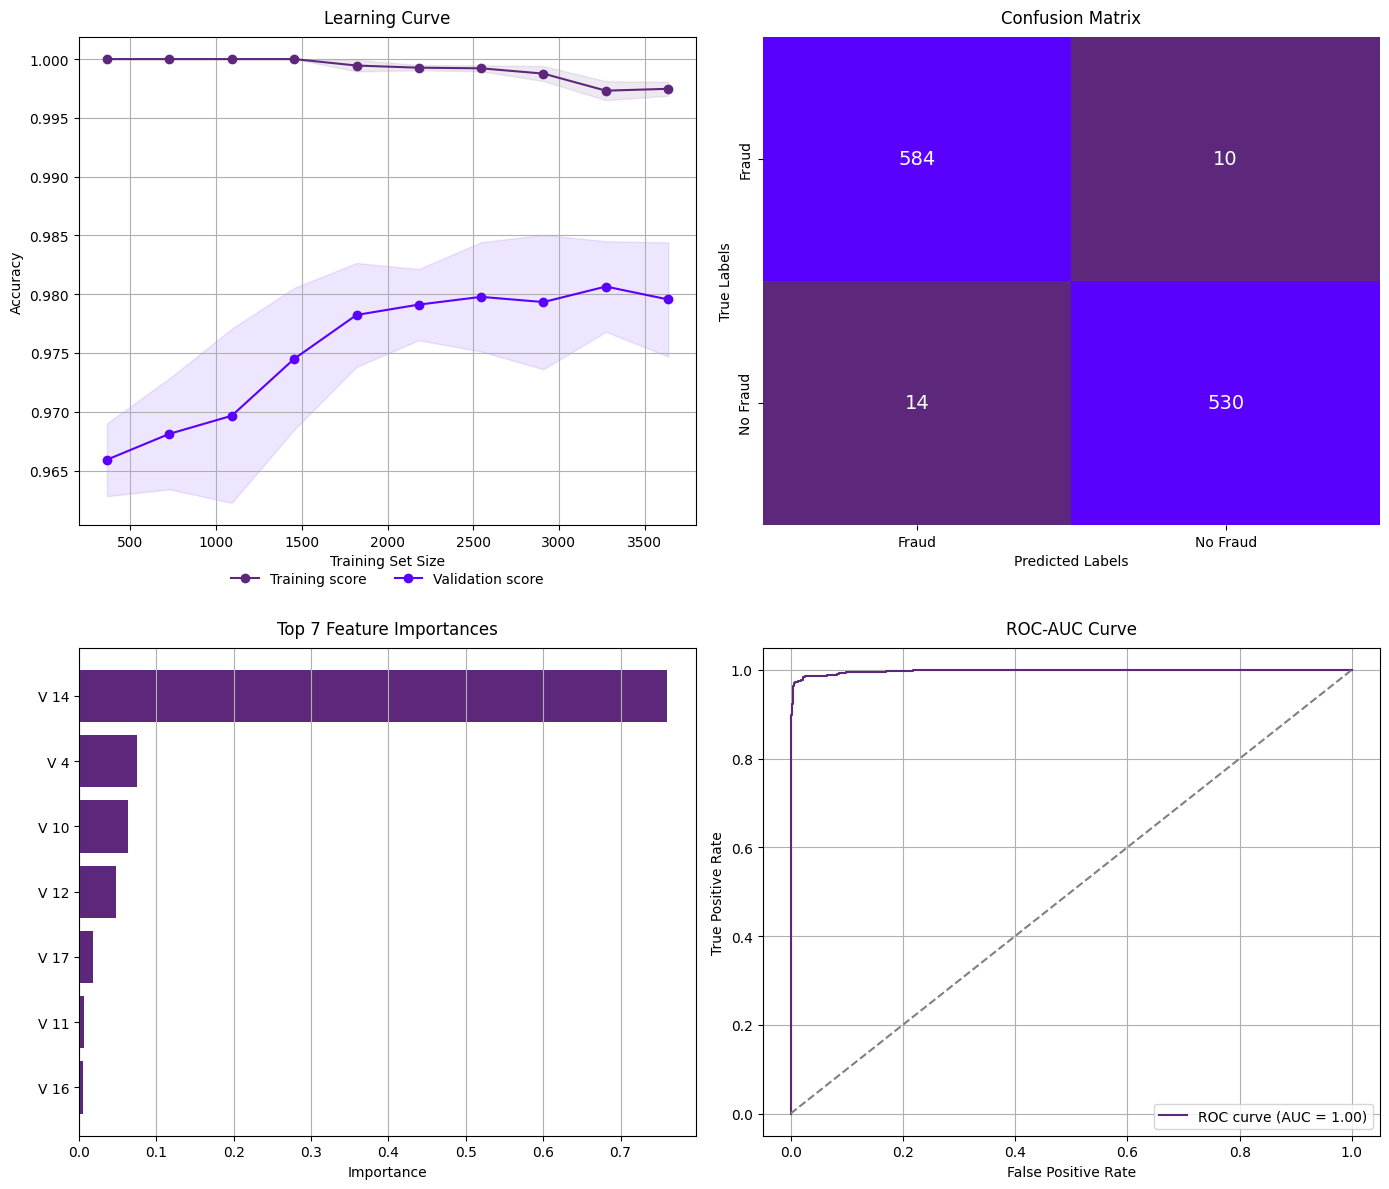

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
evaluate_and_visualize(gb, X_train_scaled, X_test_scaled, y_train, y_test)

# **6.8 | LightGBM:**
LightGBM is a gradient boosting framework that uses tree-based learning algorithms optimized for speed and efficiency on large datasets.


Train and Test Accuracy Scores:
	>> Train Accuracy: 100.0%
	>> Test Accuracy: 98.858%


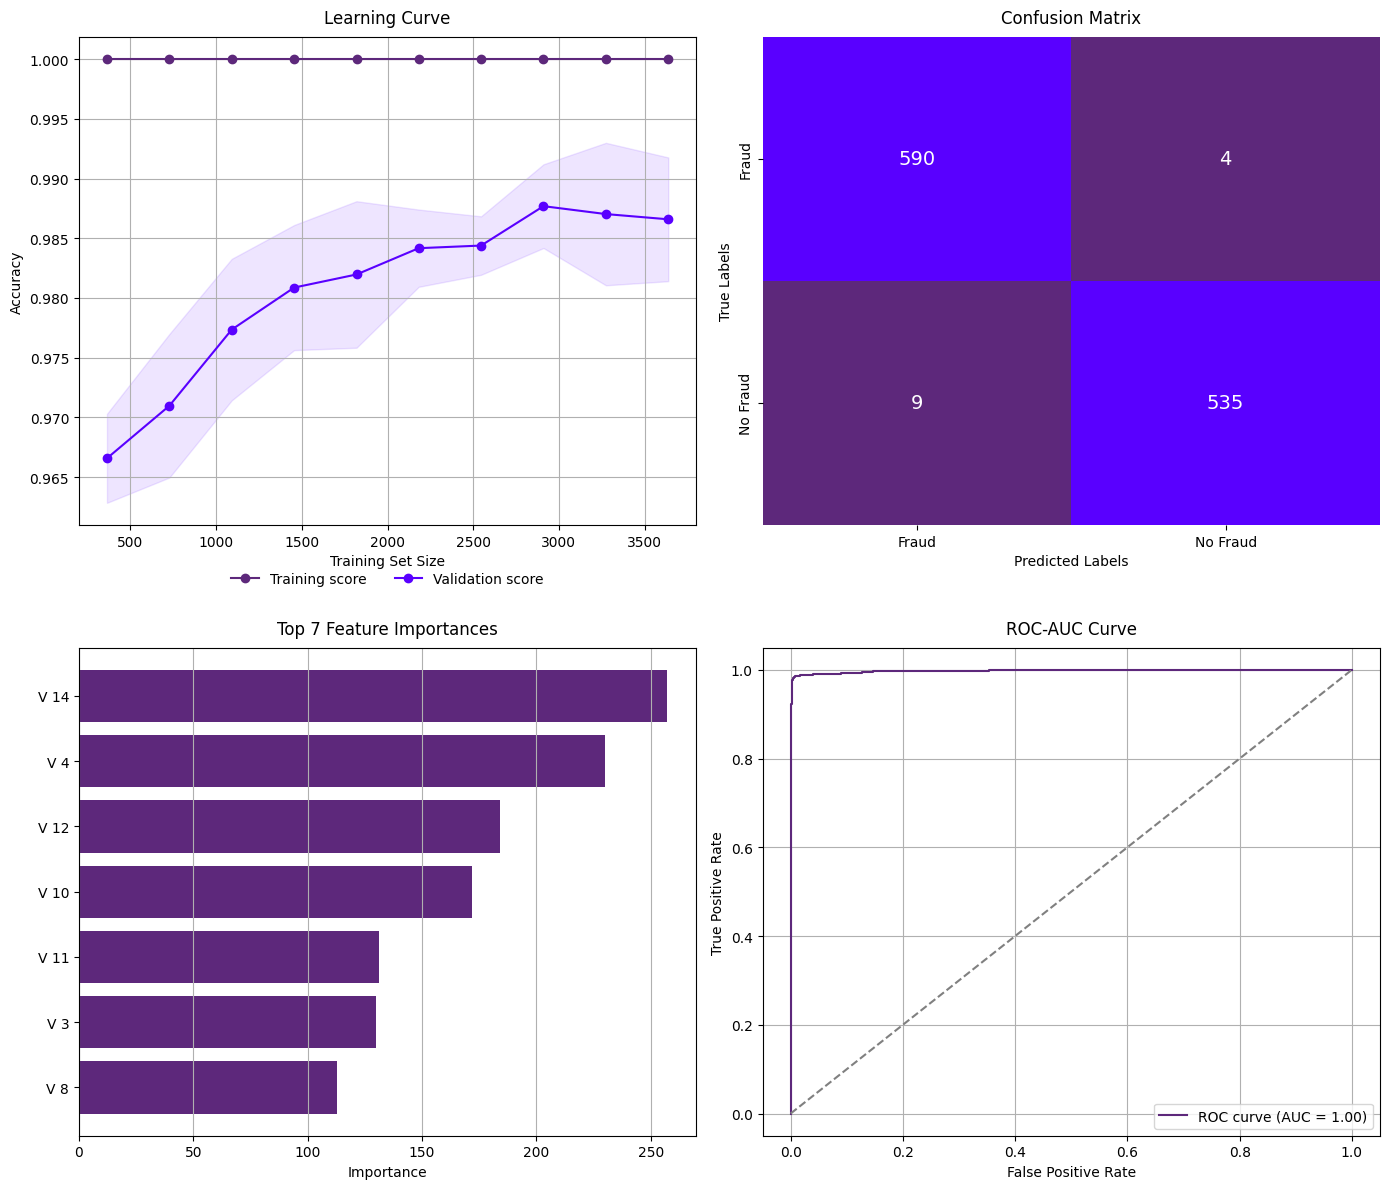

In [ ]:
# LightGBM
lgbm = LGBMClassifier(random_state=42,verbose=-1)
evaluate_and_visualize(lgbm, X_train_scaled, X_test_scaled, y_train, y_test)

# **7. | Model Evaluation 📈:**
This section evaluates the **performance of the trained models** using various metrics such as accuracy, precision, recall, F1-score, or RMSE. The results will be visualized for better interpretation.

In [ ]:
metrics_df_sorted = pd.DataFrame(model_metrics)
metrics_df_sorted=metrics_df_sorted.sort_values('Accuracy',ascending=False)

In [ ]:
metrics_df_sorted

,Model,Precision,Recall,F1-Score,Accuracy
2,ExtraTreesClassifier,0.991263,0.991213,0.991210,0.991213
5,LGBMClassifier,0.988610,0.988576,0.988574,0.988576
1,RandomForestClassifier,0.986886,0.986819,0.986815,0.986819
4,GradientBoostingClassifier,0.978928,0.978910,0.978907,0.978910
0,LogisticRegression,0.975658,0.975395,0.975378,0.975395
3,AdaBoostClassifier,0.973825,0.973638,0.973623,0.973638


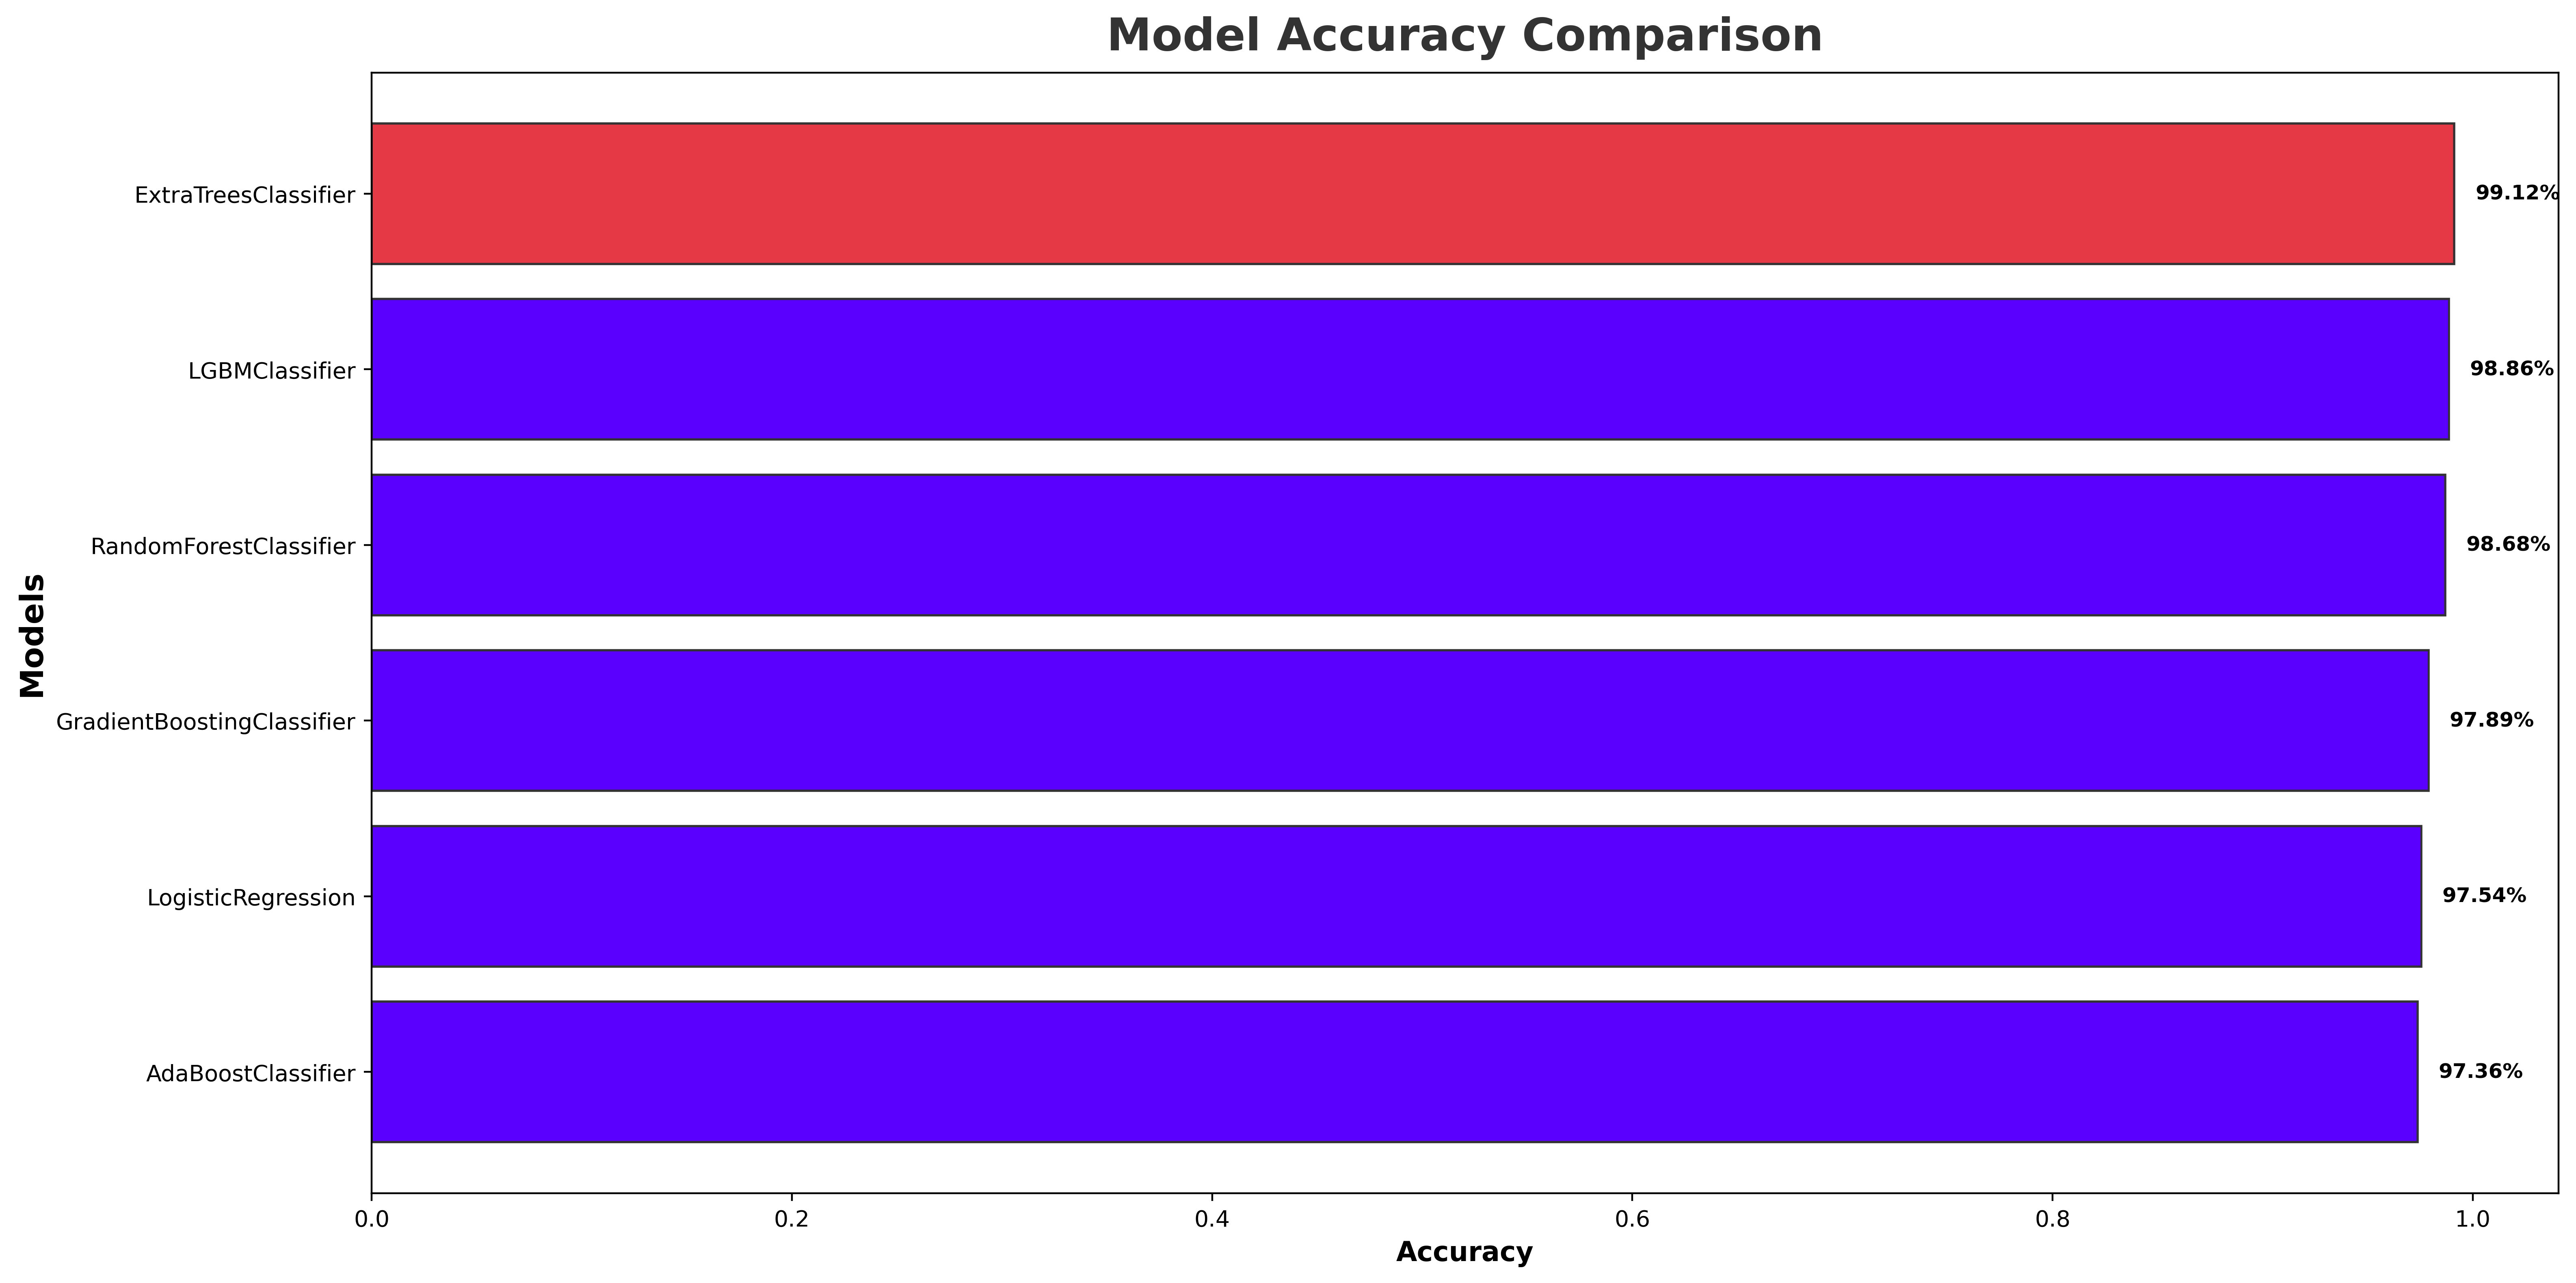

In [ ]:
# Sample data
models = metrics_df_sorted["Model"]
accuracy = metrics_df_sorted["Accuracy"]
# Colors for the bars
colors = ["#E63946"] * 1 + ["#5900FF"] * 7

# Create the plot
plt.figure(figsize=(16, 8),dpi=400)
plt.barh(models, accuracy, color=colors, edgecolor="#333333")

# Add labels and title
plt.xlabel("Accuracy", fontsize=12, weight="bold")
plt.ylabel("Models", fontsize=14, weight="bold")
plt.title("Model Accuracy Comparison", fontsize=20, weight="bold", color="#333333", pad=10)

# Reverse the order of models for better readability
plt.gca().invert_yaxis()

# Add accuracy values to the bars
for i, value in enumerate(accuracy):
    plt.text(value + 0.01, i, f"{value:.2%}", va="center", fontsize=9, weight="bold")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# **Model Performance Comparison:**
The table highlights the performance of different classification models, evaluated based on key metrics such as **Precision, Recall, F1-Score, and Accuracy.**
*  **Best Performing Model:**
    *   ExtraTreesClassifier achieves the highest scores across all metrics, making it the top-performing model with an Accuracy of 0.991213.
*  **Runner-up Models:**
    *   LGBMClassifier closely follow, each demonstrating excellent performance with Accuracy above 0.9885.
*   **Lower Ranked Models:**
    *   LogisticRegression and AdaBoostClassifier rank lower but still maintain solid performance, achieving Accuracy around 0.975.

These results provide insights into model selection, indicating that tree-based models outperform others for this classification task.






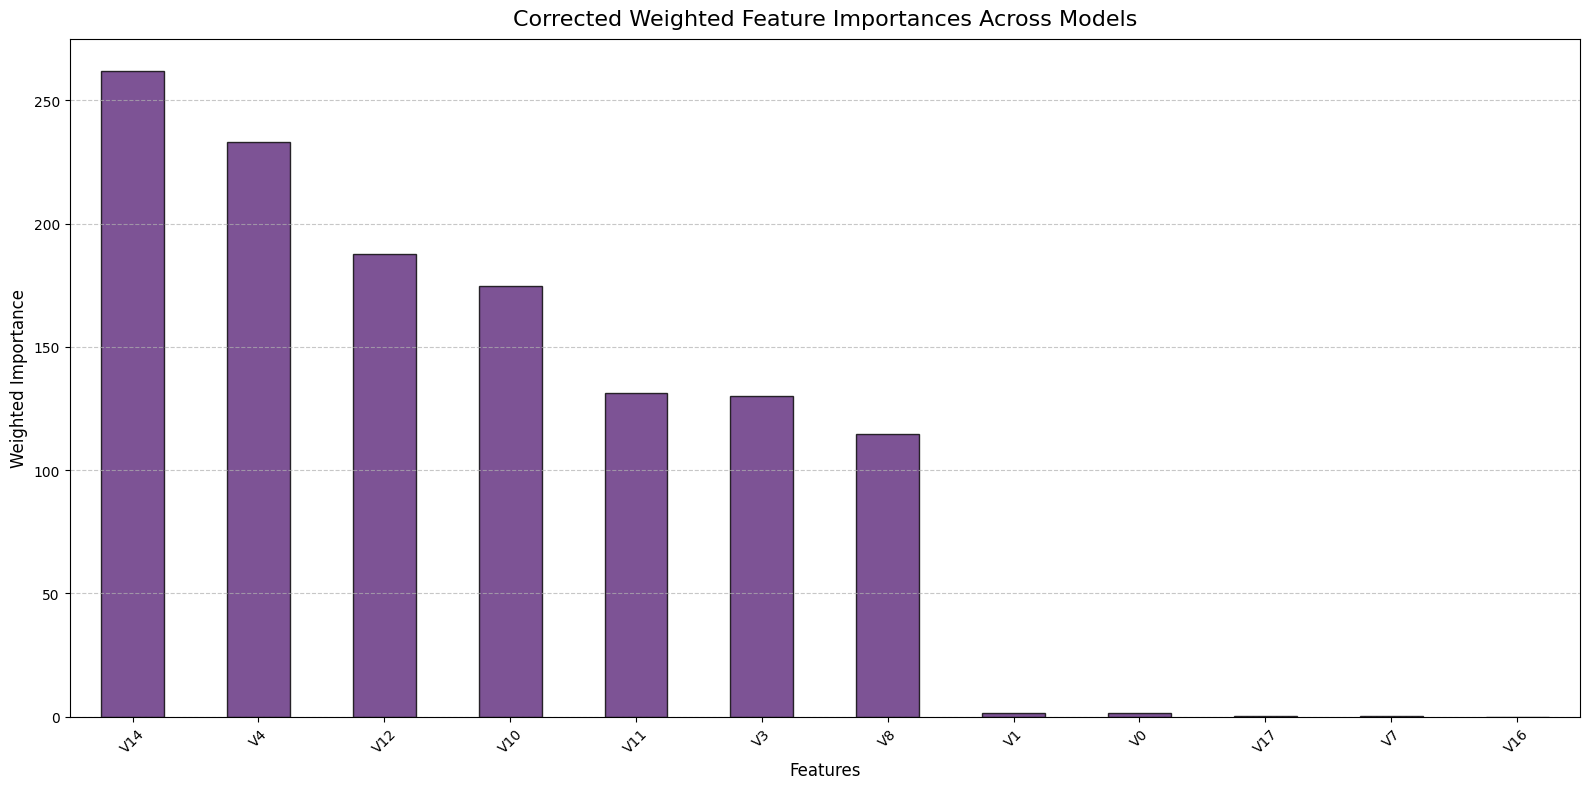

In [ ]:
rows = []
for entry in feature_importance_list:
    model = entry['Model']
    for feature, importance in entry['Feature Importances'].items():
        rows.append({'Model': model, 'Feature': feature, 'Importance': importance})

df_features = pd.DataFrame(rows)

# Recalculate the weighted average taking into account ModelCount
weighted_importances_corrected = (
    df_features.groupby('Feature')
    .agg(ImportanceSum=('Importance', 'sum'), ModelCount=('Feature', 'count'))
)
weighted_importances_corrected['WeightedImportance'] = (
    weighted_importances_corrected['ImportanceSum'] / weighted_importances_corrected['ModelCount']
)

# Taking ModelCount into account when weighing
weighted_importances_corrected['WeightedImportance'] *= weighted_importances_corrected['ModelCount']

# Sort by weighted value
weighted_importances_corrected = weighted_importances_corrected.sort_values(by='WeightedImportance', ascending=False)

# Graphing
plt.figure(figsize=(16, 8))
weighted_importances_corrected['WeightedImportance'].plot(kind='bar', color='#5D287B', alpha=0.8, edgecolor='black')
plt.title('Corrected Weighted Feature Importances Across Models', fontsize=16, pad=10)
plt.ylabel('Weighted Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Feature Importance Analysis:**
The analysis of feature importances across multiple classification models reveals key insights about the most impactful features for prediction. Below is a summary of the findings:
*   **Most Significant Feature: V14**
    
    The feature V14 consistently appears as the most important or among the top features across all models. It shows particularly high importance in:
    *   LGBMClassifier with an importance score of 257.
    *   GradientBoostingClassifier and XGBClassifier, where it also dominates the importance metrics.
*   **Other Highly Significant Features:**

    The following features also consistently rank high across models:
    *   V4: A key feature with high scores in LGBMClassifier, and ExtraTreesClassifier.
    *   V12: Frequently among the top three features in models like LogisticRegression and ExtraTreesClassifier.
    *   V10: Demonstrates stable importance across most models, especially in tree-based classifiers.
*   **Model-Specific Insights:**

    Some features gain prominence depending on the specific model:
    *   V11: Significant in LGBMClassifier, but less important in other models.
    *   V3: Relevant in RandomForestClassifier and ExtraTreesClassifier.
    *   V8: Consistently included in models like AdaBoostClassifier and LGBMClassifier.
*   **Rarely Important Features**

    Features like V16, V1, and V0 occasionally appear in the top list for GradientBoostingClassifier, but are generally less significant overall.

The repeated importance of V14, V4, and V12 suggests these features are critical for model performance and should be prioritized in further analysis or feature engineering.
















# **8. | Conclusion and Next Steps 📝:**
This section summarizes the **key findings** and highlights the **insights** gained from the analysis. It also outlines possible next steps to further improve the model or extend the study.

# **Conclusion 🎯:**
This project successfully analyzed a highly imbalanced dataset of credit card transactions to identify fraudulent activities. Key insights include:
*   Explored **PCA-transformed features** for data understanding and visualization.
*   Developed machine learning models including **Logistic Regression, Random Forest,** and advanced gradient boosting techniques **(LightGBM)**.
*   Evaluated models using **AUPRC** to handle class imbalance effectively.

The models demonstrated strong performance, especially when handling imbalanced classes, by leveraging advanced sampling and evaluation techniques.



# **Next Steps 🔮:**
To further enhance the project, the following steps are recommended:
*   Experiment with ensemble techniques such as **Stacking** and **Blending** to combine model predictions.
*   Incorporate additional data sources or engineered features to improve model performance.
*   Deploy the model in a real-world environment and monitor its performance over time.
*   Explore techniques for real-time fraud detection using streaming data.

By implementing these steps, the project can be further optimized for scalability and deployment in production systems.
